### <font color = 'green'> Coupon Recommendation System

#### <font color = #5c5cd6>**Choice of data:** 
In-Vehicle Coupon Recommendation Data Set: https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

#### <font color = #5c5cd6> **Project Introduction:** 
The dataset "in-vehicle-coupon-recommendation" contains data on driving scenarios such as destination, weather, driver age, etc. and also asks the person whether he will accept the coupon if he is the driver. The reason for using this dataset is because it provides a lot of useful but also simple driver information that we can relate with. We plan to use supervised learning to help predict which type of driver scenarios lead to more coupon acceptance.

#### <font color = #5c5cd6> **Data Attribute Information:** 
As mentioned at - https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation
<br>

Feature Name | Description / Values
--- | ------
destination | No Urgent Place, Home, Work
passanger | Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
weather | Sunny, Rainy, Snowy
temperature | 55, 80, 30
time | 2PM, 10AM, 6PM, 7AM, 10PM
coupon | Restaurant(<\\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
expiration | 1d, 2h (the coupon expires in 1 day or in 2 hours)
gender | Female, Male
age | 21, 46, 26, 31, 41, 50plus, 36, below21
maritalStatus | Unmarried partner, Single, Married partner, Divorced, Widowed
has_Children | 1, 0
education | Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
occupation | Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations,Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
income | \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499, \\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
Bar | never, less1, 1\~3, gt8, nan,4\~8 (feature meaning: how many times do you go to a bar every month?)
CoffeeHouse | never, less1, 4\~8, 1\~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
CarryAway | n4\~8, 1\~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
RestaurantLessThan20 | 4\~8, 1\~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than \\$20 every month?)
Restaurant20To50 | 1\~3, less1, never, gt8, 4\~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month?)
toCoupon_GEQ15min | 0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
toCoupon_GEQ25min | 0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
direction_same | 0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
direction_opp | 1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
Y | 1, 0 (whether the coupon is accepted)

#### <font color = #5c5cd6> **Research Question:**
The goal of this research is to use supervised learning techniques to help predict if the drivers are more likely to accept the coupon recommended to him under specific driving scenarios. We can also use information from this data to find out which types of driving scenarios lead to more acceptance of the coupon. Prediction of driving scanarios vs coupon acceptance can help us find out which types of customer are more likely to accept coupon and potentially stop by and dine at a restaurant.


#### <font color = #5c5cd6> **Relevant Domain:** 
This study wants to see if a person will accept the coupon recommended to him in different driving scenarios https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation


*(include 2+ links to articles relating to our data)*

In [2]:
"""
Data Source, Description, Basic Data Exploration - descriptive stats, info, types of features (numeric, object, etc.), 
null values, basic charts, outliers, skewness - look at examples from our text, datacamp and hw!
"""

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 
sns.set()

df = pd.read_csv("data/in-vehicle-coupon-recommendation.csv")

In [3]:
# Import all required libraries
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import KFold,train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_text

In [4]:
# Top 10 rows of the dataset
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# Column Info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# Statistical Analysis of data
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Null values
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
# Get unique values for each variable
print(df.nunique())

for col in df:
    print("\nColumn "+ col + ":")
    print(df[col].unique())

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

Column destination:
['No Urgent Place' 'Home' 'Work']

Column passanger:
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Column weather:
['Sunny' 'Rainy' 'Snowy']

Column temperature:
[55 80 30]

Column time:
['2PM' '10AM' '6PM' '7AM' '10PM']

Column coupon:
['Restaurant(<20)' 'Coffee Hous

*From the above analysis, we can conclude that column ***toCoupon_GEQ5min*** should be removed as it has only one value.*

In [9]:
# Calculate percentage of null value rows
df_null_sum = df.isna().sum()
(df_null_sum[df_null_sum > 0] / len(df)) * 100

car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64

*Based on above values we can see that the feature ***car*** has ***99%*** NaN values. Hence we can drop this feature from the dataset.*

In [10]:
df.drop(["toCoupon_GEQ5min","car"],axis = 1, inplace = True)

In [11]:
# Find number of dupicate rows in dataset
df.duplicated().sum()

74

In [12]:
# Drop duplicates
df.drop_duplicates(inplace = True)

Index(['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
temperature
Original Skewness -2.6209593254299226
has_children
Original Skewness 2.52424247671807
toCoupon_GEQ15min
Original Skewness -2.6603285635985534
toCoupon_GEQ25min
Original Skewness 1.0868370055323842
direction_same
Original Skewness 1.572548059653226
direction_opp
Original Skewness -1.572548059653226
Y
Original Skewness -2.6186261166072593


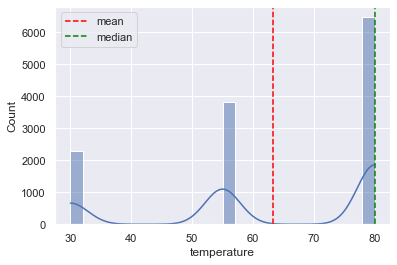

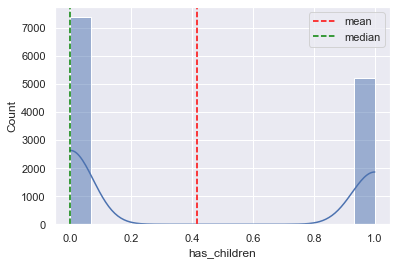

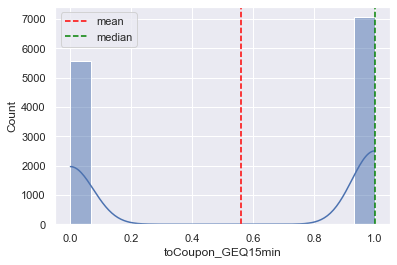

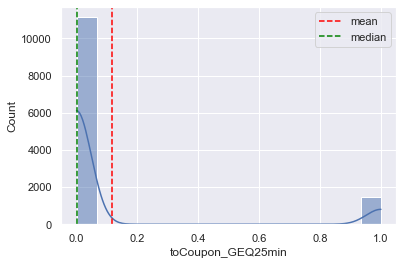

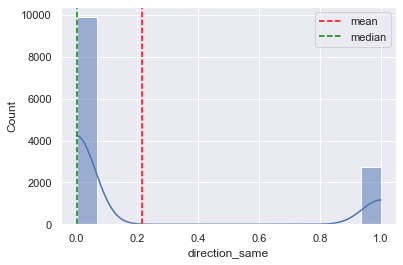

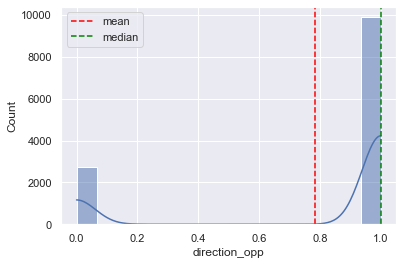

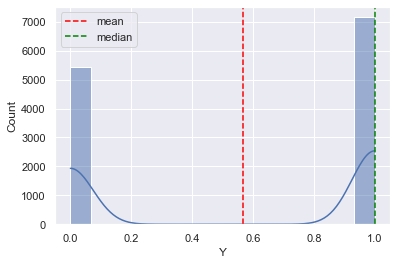

<Figure size 432x288 with 0 Axes>

In [13]:
# Visualizing skewness in the data 
num_cols = df.select_dtypes('number').columns
print(num_cols)

for col in num_cols:
    print(col)
    
    mean = np.nanmean(df[col])
    median = np.nanmedian(df[col])
    std = np.nanstd(df[col])
    skewness_old = (3*(mean-median)) / std
    print('Original Skewness',skewness_old)

    sns.histplot(df[col],kde = True)
    plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
    plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
    plt.legend()
    plt.figure()


*We can see a multi-modal distribution pattern for all the features in our dataset. Hence, sekwness cannot be reduced for such data.<br>
Moreover, we observe that all the variables (including temperature) show categorical behaviour, i.e. the values are divided into groups. We could, in this case, convert the column datatype to signify the same.*

In [14]:
# Calculating and trying to reduce skewness of categorial variables is not helpful to us.

num_cols = df.select_dtypes('number').columns
print(num_cols)

for col in num_cols:
    print('----------------------')
    print(col)
    print('----------------------')
    mean = np.nanmean(df[col])
    median = np.nanmedian(df[col])
    std = np.nanstd(df[col])
    skewness_old = (3*(mean-median)) / std
    print('Original Skewness',skewness_old)
   
    churn_sqrt = df[col].apply(np.sqrt)
    mean1 = np.nanmean(churn_sqrt)
    median1 = np.nanmedian(churn_sqrt)
    std1 = np.nanstd(churn_sqrt)
    skewness = (3*(mean1-median1)) / std1
    print('Reduced Skewness',skewness)

Index(['temperature', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
----------------------
temperature
----------------------
Original Skewness -2.6209593254299226
Reduced Skewness -2.5252312911587946
----------------------
has_children
----------------------
Original Skewness 2.52424247671807
Reduced Skewness 2.52424247671807
----------------------
toCoupon_GEQ15min
----------------------
Original Skewness -2.6603285635985534
Reduced Skewness -2.6603285635985534
----------------------
toCoupon_GEQ25min
----------------------
Original Skewness 1.0868370055323842
Reduced Skewness 1.0868370055323842
----------------------
direction_same
----------------------
Original Skewness 1.572548059653226
Reduced Skewness 1.572548059653226
----------------------
direction_opp
----------------------
Original Skewness -1.572548059653226
Reduced Skewness -1.572548059653226
----------------------
Y
----------------------


In [15]:
# Correlation Matrix
df.corr()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ15min,-0.157089,0.079434,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,-0.082693,-0.108139,0.014932,-0.014932,1.000000


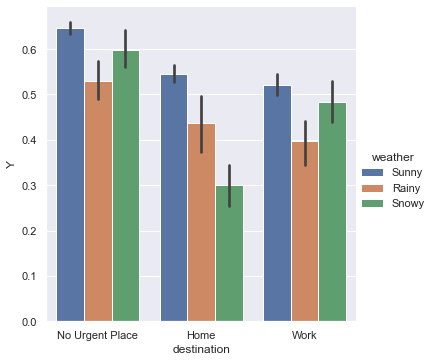

In [16]:
# Visualizing destination and weather related to our target variable
sns.catplot(x="destination", y="Y", hue="weather", kind="bar", data=df)

*From the above plot, we can see how two of the dataset features, **weather and destination** impact the rate of acceptance of coupon.*
+ Sunny weather seem to have a highest acceptance rates for coupons, regardless of the destination
+ Snowy weather shows better coupon acceptance rate when destination is Work or No Urgent Place.

In [17]:
# Find and count the columns with a null value
df.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [18]:
# Replace null values with mode of that column
na_cols = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

for col in na_cols:
    df[col] = df[col].replace(np.nan, df[col].mode()[0])

In [19]:
# Validate all nulls removed
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [20]:
# Because correlation between "direction_same" and "direction_opp"
df.drop(["direction_opp"],axis = 1, inplace = True)

In [21]:
# Change datatype of all object columns to category. This is a pre-requisite for one-hot encoding
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12610 non-null  category
 1   passanger             12610 non-null  category
 2   weather               12610 non-null  category
 3   temperature           12610 non-null  int64   
 4   time                  12610 non-null  category
 5   coupon                12610 non-null  category
 6   expiration            12610 non-null  category
 7   gender                12610 non-null  category
 8   age                   12610 non-null  category
 9   maritalStatus         12610 non-null  category
 10  has_children          12610 non-null  int64   
 11  education             12610 non-null  category
 12  occupation            12610 non-null  category
 13  income                12610 non-null  category
 14  Bar                   12610 non-null  category
 15  Co

#### <font color = #5c5cd6> **Check distribution of the data for prediction label** 

In [23]:
# Check if datset is balanced
df["Y"].value_counts(normalize=True)

1    0.567565
0    0.432435
Name: Y, dtype: float64

#### <font color = #5c5cd6> **Supervised Learning (Decision Tree and Random Forest)** 
Decision trees classification is not impacted by the outliers in the data as the data is split using scores which are calculated using the homogeneity of the resultant data points. Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

#### <font color = #5c5cd6> **One-Hot encoding** 
We split the data into features (X) and labels (y) and apply one-hot encoding on features.<br>
With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

In [24]:
X = df.drop(['Y'],axis=1)
y = df['Y']

ohe = OneHotEncoder(sparse=False)
X = pd.DataFrame(ohe.fit_transform(X), index=y.index, columns=ohe.get_feature_names(X.columns))

#### <font color = #5c5cd6> **Split into Train and test datasets** 

In [25]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 2021)

#### <font color = #5c5cd6> **Fit decision tree classifier on the data**

In [26]:
# Instantiate a DecisionTree classifier with default parameter values
dtree=DecisionTreeClassifier(random_state = 123494748)

# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
 
# Print creation message
print('Decision Tree Classifier Fitted')

Decision Tree Classifier Fitted


#### <font color = #5c5cd6> **Fit Random forest classifier on the data**
Random Forest generally performs better than other supervised methods. <br>
Scaling is again not necessary.

In [27]:
# Instantiate a RFC with default parameter values
RFC=RandomForestClassifier(random_state=400)

# Fit RFC
RFC.fit(X_train,y_train)

# Print creation message
print('RFC Model Fitted')

RFC Model Fitted


#### <font color = #5c5cd6> **Predict the labels for test dataset using both models and compare accuracies.**

In [28]:
y_pred = dtree.predict(X_test)
y_pred_rfc = RFC.predict(X_test)

# Print accuracy scores
print("Accuracy of Decision Tree:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of Random Forest Classifier:",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy of Decision Tree: 0.6901363780526483
Accuracy of Random Forest Classifier: 0.7595940374246749


As expected, Random forest classifier performs better than Decision tree classifier.

#### <font color = #5c5cd6> **Printing confusion matrix**

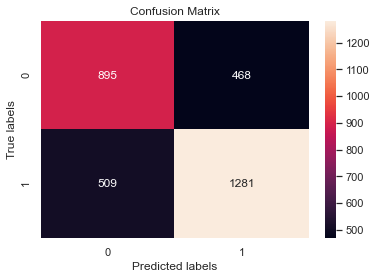

In [30]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

#### <font color = #5c5cd6> **Confusion matrix interpretation**
<img src= "https://miro.medium.com/max/2400/1*VSchph99Wiv6tQpNIvMJbw.png" width = 400 align = 'right'><br>
1.TN / True Negative: the true label is 0 and predicted 0. <br>
2.TP / True Positive:  the true label is 1 and predicted 1.<br>
3.FN / False Negative: the true label is 1 and predicted 0.<br>
4.FP / False Positive: the true label is 0 and predicted 1.<br><br>


#### <font color = #5c5cd6> **Printing Classification report**

In [29]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.64      0.66      0.65      1363
           1       0.73      0.72      0.72      1790

    accuracy                           0.69      3153
   macro avg       0.68      0.69      0.69      3153
weighted avg       0.69      0.69      0.69      3153



#### <font color = #5c5cd6> **Classification report interpretation**
+ **Precision** — What percent of your predictions were correct. <br> &emsp;It is the ability of a classifier not to label an instance as 1 that is actually 0 and vice versa.
+ **Recall** — What percent of the positive cases were captured. <br> &emsp;
   It is the ability of a classifier to find all positive instances.
+ **F1** — What percent of positive predictions were correct. <br> &emsp; The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0
+ **Support** — Support is the number of actual occurrences of the class in the specified dataset. <br> &emsp; Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.


#### <font color = #5c5cd6> **Printing one of the trees generated by random forest**

In [30]:
tree_rules = export_text(RFC.estimators_[99])
print(tree_rules)

|--- feature_19 <= 0.50
|   |--- feature_110 <= 0.50
|   |   |--- feature_33 <= 0.50
|   |   |   |--- feature_22 <= 0.50
|   |   |   |   |--- feature_86 <= 0.50
|   |   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |   |--- feature_76 <= 0.50
|   |   |   |   |   |   |   |--- feature_91 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   | 

### <font color = #5c5cd6> **Try other models**

In [31]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

#### <font color = #5c5cd6> **Fit Logistic Regression model on the data**

In [32]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

# Print creation message
print('Logistic Regression Model Fitted')

Logistic Regression Model Fitted


In [33]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

Accuracy of logistic regression classifier:  0.6834760545512211


#### <font color = #5c5cd6> **Fit Support vector machine on the data**

In [34]:
SVM = SVC(kernel="rbf", random_state=7, probability=True, cache_size=500, gamma=0.1).fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM = SVM.predict(X_test)

# Get the accuracy score of SVC model and print it
print("Accuracy of SVC:",metrics.accuracy_score(y_test, y_pred_SVM))

Accuracy of SVC: 0.7564224548049476


### <font color = #5c5cd6> **Try to improve accuracy by hyper-parameter tuning for models with high accuracy**

#### <font color = #5c5cd6> **Use K-Fold cross validation to find model accuracy**
In k-fold coss validation the dataset is randomly partitioned into *k* equal sized subsamples.<br>
A single subsample is retained as the validation data for testing the model, and the remaining *k − 1* subsamples are used as training data. 
<br>The cross-validation process is then repeated *k* times, with each of the *k* subsamples used exactly once as the validation data.
<br>The *k* results are averaged to produce a single estimation.

In [35]:
kf = KFold(
    n_splits=5,
    shuffle=True,
    random_state=7
)

#### <font color = #5c5cd6> **Import and fit Gradient Boosting Classifier on the data**

In [36]:
gbc = GradientBoostingClassifier(
    max_depth=7,
    min_samples_split=5,
    random_state=7
)

gbc_acc = 0
gbc_cfm = np.zeros((2, 2))

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    gbc_acc = gbc_acc + accuracy_score(y_test, y_pred)
    gbc_cfm = gbc_cfm + confusion_matrix(y_test, y_pred)

print("K-fold accuracy of Gradient Boosting classifier: ",gbc_acc/kf.get_n_splits())

K-fold accuracy of Gradient Boosting classifier:  0.7603489294210943


In [37]:
# Check accuracy of RFC that we created, this time using KFold for splitting data into training and testing 
RFC=RandomForestClassifier(random_state=400)

rfc_acc = 0
rfc_cfm = np.zeros((2, 2))

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    rfc_acc = rfc_acc + accuracy_score(y_test, y_pred)
    rfc_cfm = rfc_cfm + confusion_matrix(y_test, y_pred)
    
print("K-fold accuracy of Random Forest classifier: ",rfc_acc/kf.get_n_splits())

K-fold accuracy of Random Forest classifier:  0.7557494052339413


In [38]:
svm = SVC(kernel="rbf", random_state=7, probability=True, cache_size=500, gamma=0.1)

svm_acc = 0
svm_cfm = np.zeros((2, 2))

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    svm_acc = svm_acc + accuracy_score(y_test, y_pred)
    svm_cfm = svm_cfm + confusion_matrix(y_test, y_pred)

print("K-fold accuracy of Support Vector Machine classifier: ",svm_acc/kf.get_n_splits())

K-fold accuracy of Support Vector Machine classifier:  0.7589214908802537


### <font color = #5c5cd6> **Try feature selection**


In [39]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
model.feature_importances_
highest_65 = sorted(range(len(model.feature_importances_)), key=lambda x: model.feature_importances_[x])[-65:]

In [40]:
# Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100,random_state = 400)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train.iloc[:,highest_65] ,y_train)

y_pred=clf.predict(X_test.iloc[:,highest_65])

print("Accuracy of RFC classifier: ", clf.score(X_test.iloc[:,highest_65],y_test))

Accuracy of RFC classifier:  0.7498017446471055


In [41]:
highest_100 = sorted(range(len(model.feature_importances_)), key=lambda x: model.feature_importances_[x])[-100:]

# Instantiate a DecisionTree classifier with default parameter values
dtree=DecisionTreeClassifier(random_state = 123494748)

# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
dtree.fit(X_train.iloc[:,highest_100],y_train)

#print creation message
print('Decision Tree Classifier Created')
print("Accuracy of DecisionTree classifier: ", dtree.score(X_test.iloc[:,highest_100],y_test))

Decision Tree Classifier Created
Accuracy of DecisionTree classifier:  0.6958762886597938


In [42]:
SVM = SVC(kernel="rbf", random_state=7, probability=True, cache_size=500, gamma=0.1).fit(X_train.iloc[:,highest_65], y_train)

#Predict the response for test dataset
y_pred_SVM = SVM.predict(X_test.iloc[:,highest_65])

print("Accuracy of SVC:",metrics.accuracy_score(y_test, y_pred_SVM))

Accuracy of SVC: 0.7569389373513085


### <font color = #5c5cd6> Conclusion <br>

+ From the above results we can observe that SVM and RFC give the highest accuracy (~76%)
+ Even after trying various methods like feature selection, k-fold cross validation we are unable to boost the accuracy of the model by a significant amount.